<a href="https://colab.research.google.com/github/Nacho2904/orga_de_datos/blob/main/tp3visus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive 

drive.mount('/content/gdrive')
path_a_training_set = 'gdrive/MyDrive/TP3 dataset music/train.parquet'

#4.95 16:16
#4.96 16:28

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
df_music = pd.read_parquet(path_a_training_set)

In [6]:
df_music.head()

,track_name,lyric,genre,language,popularity,artist,a_genres,a_songs,a_popularity,did,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Halo,Remember those walls I built\nWell baby they'r...,Dance,en,79,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
1,Halo,Remember those walls I built\nWell baby they'r...,Pop,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
2,Halo,Remember those walls I built\nWell baby they'r...,R&B,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
3,Partition,Driver roll up the partition please\nDriver ro...,Dance,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
4,Partition,Driver roll up the partition please\nDriver ro...,Pop,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174


In [14]:
df_music.describe()

,popularity,a_songs,a_popularity,did,s-label,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,31383.000000,31383.000000,31383.000000,7004.000000,7004.000000,31383.000000,31383.000000,3.138300e+04,31383.000000,31383.000000,31383.000000,31383.000000,31383.000000,31383.000000,31383.000000
mean,53.394131,157.816716,8.535481,77926.453598,0.490309,0.204786,0.562056,2.356413e+05,0.680652,0.054620,0.191566,-7.049882,0.082286,121.824346,0.498826
std,12.608777,107.946587,21.634140,46585.206681,0.236605,0.268975,0.154644,6.795071e+04,0.216309,0.169244,0.150965,3.368481,0.087809,30.278152,0.235068
min,0.000000,1.000000,0.000000,167.000000,0.032100,0.000001,0.061700,3.141300e+04,0.007560,0.000000,0.009670,-33.350000,0.022200,34.717000,0.027200
25%,46.000000,87.000000,0.000000,38101.750000,0.301000,0.007815,0.457000,1.973730e+05,0.539000,0.000000,0.096000,-8.631500,0.034200,97.025000,0.313000
50%,54.000000,127.000000,1.500000,77514.000000,0.476000,0.070300,0.561000,2.269380e+05,0.716000,0.000019,0.130000,-6.220000,0.047500,119.974000,0.492000
75%,62.000000,199.000000,5.500000,120687.250000,0.674000,0.314000,0.671000,2.634735e+05,0.858000,0.003160,0.249000,-4.679000,0.086300,141.869000,0.681000
max,100.000000,759.000000,205.500000,158320.000000,0.984000,0.995000,0.986000,1.618693e+06,0.998000,0.994000,0.991000,0.605000,0.959000,220.041000,0.986000


Empezamos a plantear los plots. Lo primero que podríamos pensar es que hay géneros más populares que otros, y que esta feature podría ser bastante importante (en general, guiaremos el análisis con este objetivo, encontrar/descubrir features interesantes). Esto se debe a que géneros como el Pop o el Rock deberían ser más populares que otros géneros debido al carácter comercial de la música que producen los artistas de dicho género y a su inmensa variedad, por lo tanto, la popularidad podría ser muy útil para nuestro modelo. Para confirmar dicha suposición emplearemos un boxplot.

In [54]:
df_music_grouped_by_genre = df_music.groupby("genre").agg(np.median)
genres_ordered_by_median_popularity = list(df_music_grouped_by_genre.reset_index().sort_values("popularity").genre)

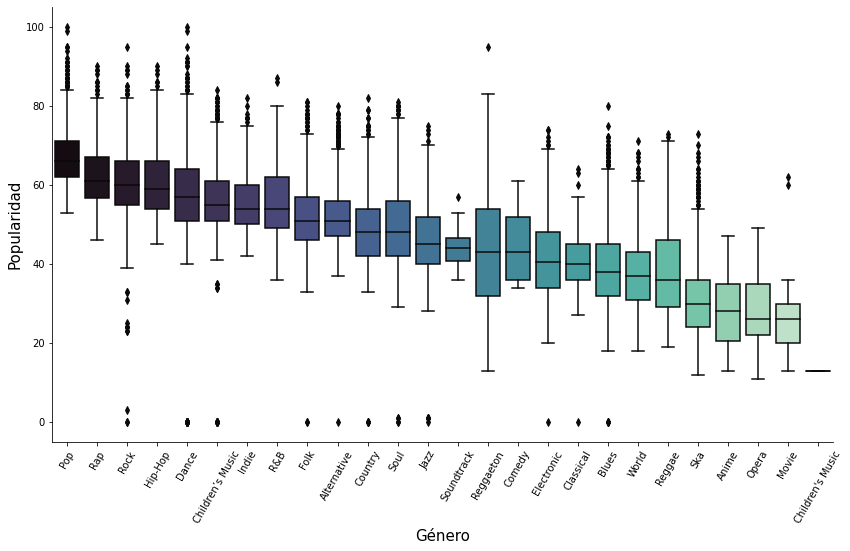

In [59]:
plt.figure(figsize=(14,8))
sns.boxplot(x = df_music.genre, y = df_music.popularity, order = genres_ordered_by_median_popularity[::-1],
            palette = "mako")
sns.despine()
plt.ylabel("Popularidad", fontsize = 15)
plt.xlabel("Género", fontsize = 15)
plt.xticks(rotation = 60, fontsize = 10);

Notamos que hay un label particularmente patológico: el de música para niños (Children's Music). Analizamos esto más a fondo.

In [67]:
df_music_recuento_filas_por_genero = df_music.groupby("genre").count().reset_index()[["genre", "track_name"]].rename(
    columns = {"track_name": "Recuento de filas"}).sort_values("Recuento de filas")
df_music_recuento_filas_por_genero


,genre,Recuento de filas
3,Children's Music,1
15,Opera,9
24,Soundtrack,16
14,Movie,29
6,Comedy,37
1,Anime,47
5,Classical,147
20,Reggaeton,358
25,World,487
13,Jazz,612


Notamos que hay varios labels para los cuales casi no tenemos nada de información. Específicamente:

In [71]:
df_music_recuento_filas_por_genero[df_music_recuento_filas_por_genero["Recuento de filas"] < 50]

,genre,Recuento de filas
3,Children's Music,1
15,Opera,9
24,Soundtrack,16
14,Movie,29
6,Comedy,37
1,Anime,47


Vemos que tenemos muy pocas observaciones de Opera, Soundtrack, Movie, Comedy y Anime. No solo eso, si no que algunos de estos "géneros" como Movie o Anime son naturalmente malos puesto que son música de otros géneros cuya única diferencia es pertecener a una película, pero son fundamentalmente indistinguibles de música normal. Por otro lado, no pasa esto último con los soundtrack y las óperas, pero seguramente generarán problemas para nuestros futuros modelos por tener demasiada poca información. Eliminamos todos estos géneros problemáticos del dataset, y arreglamos lo de la música para niños

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


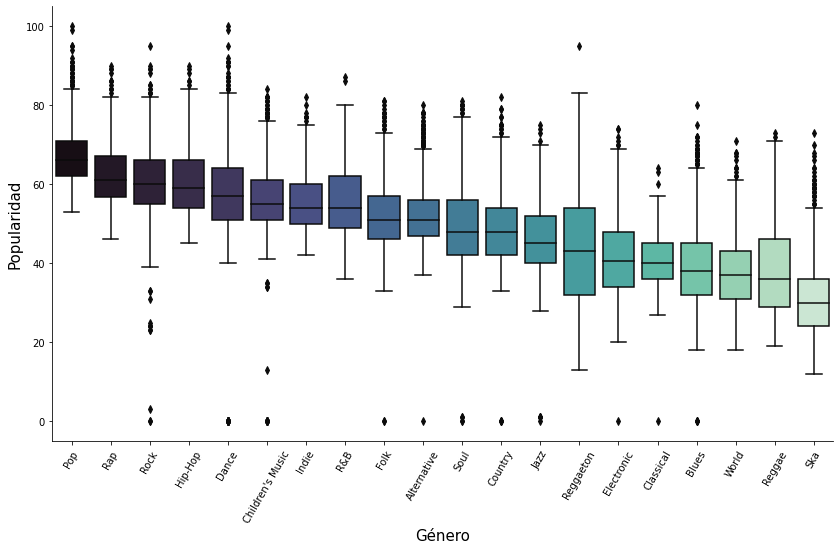

In [77]:
generos_problematicos = list(df_music_recuento_filas_por_genero[df_music_recuento_filas_por_genero["Recuento de filas"] < 50].genre)[1:]
df_music_filtered = df_music[~df_music["genre"].isin(generos_problematicos)]
df_music_filtered.loc[df_music_filtered["genre"].str.contains("Children"), "genre"] = "Children's Music"
df_music_grouped_by_genre = df_music_filtered.groupby("genre").agg(np.median)
genres_ordered_by_median_popularity = list(df_music_grouped_by_genre.reset_index().sort_values("popularity").genre)

plt.figure(figsize=(14,8))
sns.boxplot(x = df_music_filtered.genre, y = df_music_filtered.popularity, order = genres_ordered_by_median_popularity[::-1],
            palette = "mako")
sns.despine()
plt.ylabel("Popularidad", fontsize = 15)
plt.xlabel("Género", fontsize = 15)
plt.xticks(rotation = 60, fontsize = 10);

Notamos que nuestras sospechas eran correctas pues si por ejemplo tuviésemos que clasificar si una canción es de pop, jazz o ska podríamos hacerlo casi solo con mirar la popularidad, por lo que efectivamente es una métrica interesante.

Lo siguente que podría interesarnos es cómo se mezclan los géneros. Esto nos podría interesar para poder analizar luego por qué se confunde nuestro clasificador. Calcularemos la probabilidad de que una canción de un determinado género, tenga también otro género, para todos los géneros

In [107]:
#Este df contiene los géneros que tiene cada canción
df_music_filtered_grouped_by_song = df_music.groupby("track_name")["genre"].agg(lambda x : ','.join(x)).reset_index()["genre"].to_frame()
df_music_filtered_grouped_by_song["genre"] = df_music_filtered_grouped_by_song["genre"].map(lambda genres: tuple(genres.split(",")))
df_music_filtered_grouped_by_song

,genre
0,"(Dance, R&B, Hip-Hop)"
1,"(Alternative, Dance, Children’s Music, Rock)"
2,"(Dance,)"
3,"(Blues,)"
4,"(Hip-Hop, Rap)"
...,...
13305,"(Hip-Hop, Rap)"
13306,"(Hip-Hop, Rap, Pop)"
13307,"(Hip-Hop, Rap)"
13308,"(Hip-Hop, Rap)"


In [120]:
list_of_genres = df_music_filtered.genre.unique()
genres_indexes_dict = {genres[i]:i for i in range(0,len(genres))}

def create_genres_vectors_from_genres(song_genres: tuple) -> np.array:
  song_genres_indexes = [0 for genre in list_of_genres]
  song_genres_vectors = [0 if list_of_genres.index(genre) not in song_genres_indexes else 1 
                         for genre in list_of_genres]
  return np.array(song_genres_vectors)
  
df_music_filtered_grouped_by_song["genres_vector"] = df_music_filtered_grouped_by_song["genre"].map(create_genres_vectors_from_genres)

SyntaxError: ignored